In [ ]:
# Credit Risk & Personal Loan Analysis

## 1. Business Objective
## 2. Dataset Overview
## 3. Data Cleaning & Preparation
## 4. Target Variable Analysis
## 5. Univariate Analysis
## 6. Bivariate Analysis vs Loan Acceptance
## 7. Correlation Analysis
## 8. Risk Segmentation Insights
## 9. Key Findings & Business Implications

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx")

In [4]:
#Target Variable Analysis
df['Personal_Loan'].value_counts(normalize=True) * 100

Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64

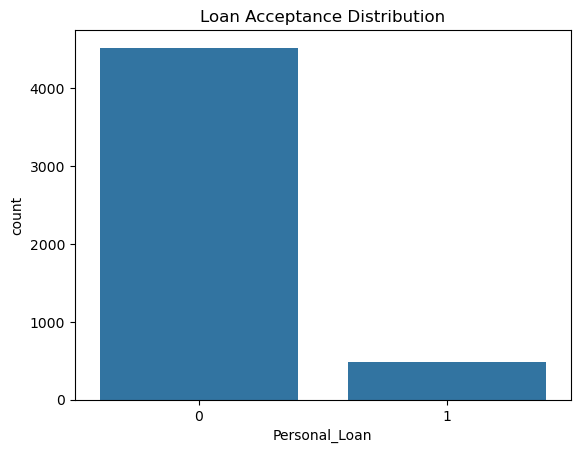

In [5]:
sns.countplot(x='Personal_Loan', data=df)
plt.title("Loan Acceptance Distribution")
plt.show()

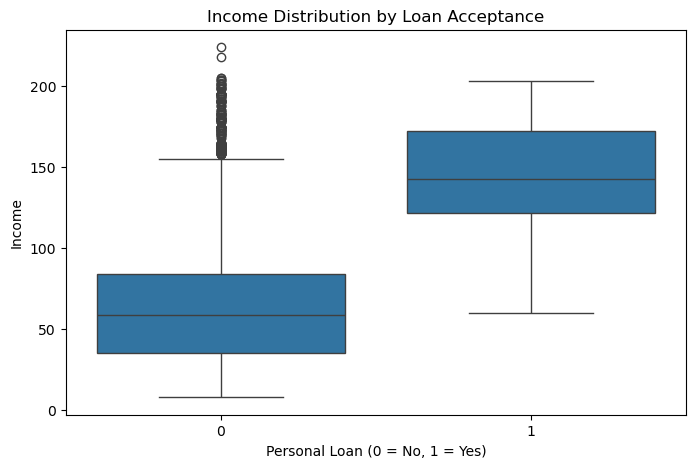

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Personal_Loan', y='Income', data=df)
plt.title('Income Distribution by Loan Acceptance')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.show()

C:\Users\arvin\AppData\Local\Temp\ipykernel_14108\3850038347.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_acceptance = df.groupby('Income_Segment')['Personal_Loan'].mean() * 100


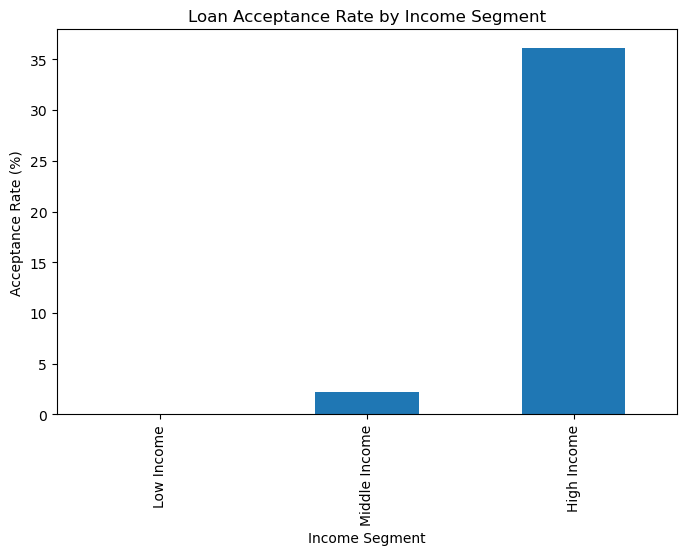

In [9]:
df['Income_Segment'] = pd.cut(
    df['Income'],
    bins=[0, 50, 100, df['Income'].max()],
    labels=['Low Income', 'Middle Income', 'High Income']
)

income_acceptance = df.groupby('Income_Segment')['Personal_Loan'].mean() * 100

income_acceptance.plot(kind='bar', figsize=(8,5))
plt.title('Loan Acceptance Rate by Income Segment')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Income Segment')
plt.show()

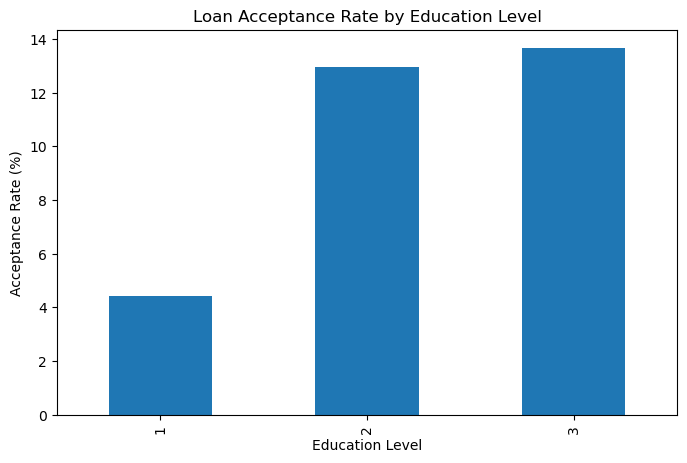

In [10]:
education_acceptance = df.groupby('Education')['Personal_Loan'].mean() * 100

education_acceptance.plot(kind='bar', figsize=(8,5))
plt.title('Loan Acceptance Rate by Education Level')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Education Level')
plt.show()

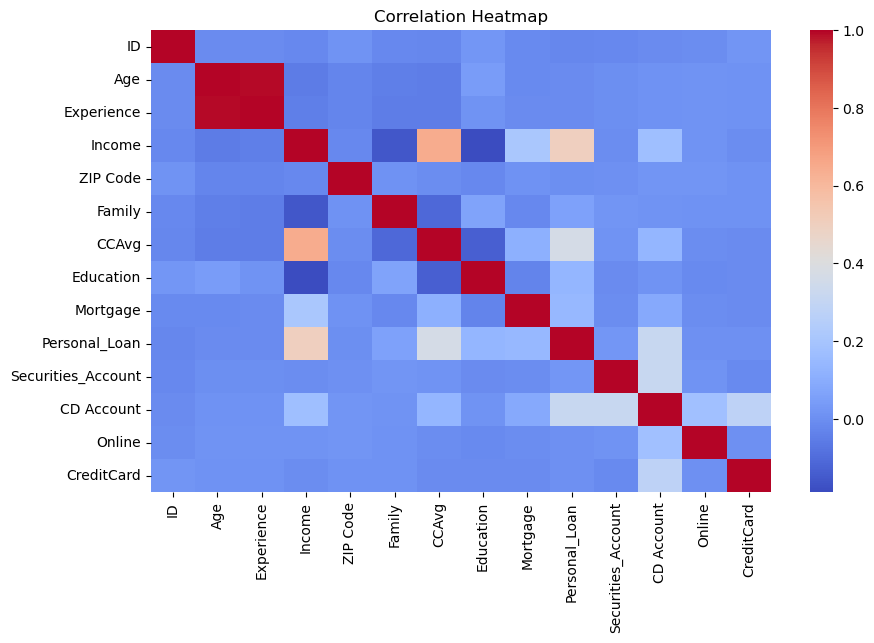

In [12]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
## Key Findings

"""Personal loan penetration in the customer base is low at 9.6%, indicating conservative overall credit exposure.

Loan acceptance is heavily skewed toward high-income customers, who account for over 90% of total personal loan exposure.

Education level reinforces this trend, with graduate and professionally educated customers showing significantly higher loan uptake.

Income emerges as the single most influential variable driving personal loan exposure, with clear separation between loan and non-loan customers."""

## Business Implications

"""The bank’s current lending strategy prioritizes credit quality over aggressive growth, effectively limiting default risk.

High concentration of exposure within a single income segment introduces portfolio concentration risk, which should be actively monitored.

Selective expansion into well-screened middle-income segments could improve portfolio diversification without materially increasing risk.

Credit policies should continue emphasizing income stability and education as key underwriting criteria."""

In [14]:
df.to_csv("credit_risk_tableau.csv", index=False)